/var/folders/kr/lr4hhtnn3zb2jllwz7qjjbhc0000gn/T/ipykernel_24623/11775274.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.93])
/var/folders/kr/lr4hhtnn3zb2jllwz7qjjbhc0000gn/T/ipykernel_24623/11775274.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


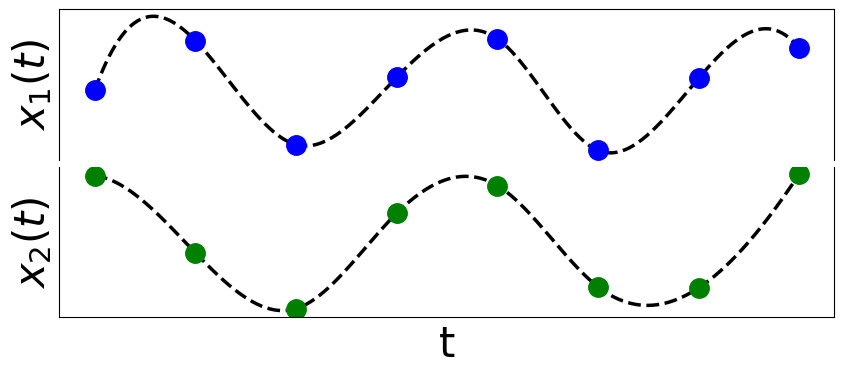

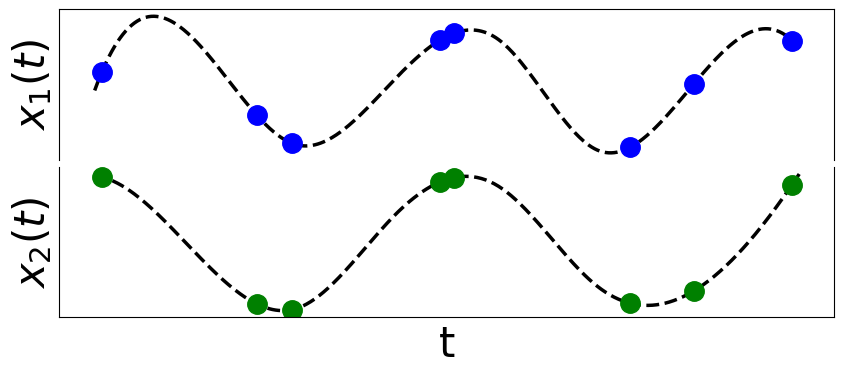

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x = np.linspace(0, 10, 500)
y1 = np.sin(1.5 * x) + 0.1 * np.random.randn(len(x))
y2 = np.cos(1.2 * x) + 0.1 * np.random.randn(len(x))
marker_x_even      = np.linspace(x.min(), x.max(), 8)
marker_x_irregular = np.array([0.1, 2.3, 2.8, 4.9, 5.1, 7.6, 8.5, 9.9])
marker_y1_even = np.interp(marker_x_even, x, y1)
marker_y2_even = np.interp(marker_x_even, x, y2)

# smooooth lines
f1 = interp1d(marker_x_even, marker_y1_even, kind='cubic')
f2 = interp1d(marker_x_even, marker_y2_even, kind='cubic')
x_smooth = np.linspace(x.min(), x.max(), 500)
y1_smooth = f1(x_smooth)
y2_smooth = f2(x_smooth)

marker_y1_irreg = f1(marker_x_irregular)
marker_y2_irreg = f2(marker_x_irregular)

# parameters for font sizes to increase sizes
label_fs = 30
line_w   = 2.5
dot_s    = 14

fig1, (ax1_top, ax1_bot) = plt.subplots(
    2, 1, sharex=True, figsize=(10, 4),
    gridspec_kw={'hspace': 0.05}
)
ax1_top.plot(x_smooth, y1_smooth, '--', color='black', linewidth=line_w)
ax1_top.plot(marker_x_even, marker_y1_even, 'o', color='blue',  markersize=dot_s)
ax1_top.set_ylabel(r'$x_1(t)$', fontsize=label_fs)
ax1_top.set_xticks([]); ax1_top.set_yticks([])
ax1_top.spines['bottom'].set_visible(False)

ax1_bot.plot(x_smooth, y2_smooth, '--', color='black', linewidth=line_w)
ax1_bot.plot(marker_x_even, marker_y2_even, 'o', color='green', markersize=dot_s)
ax1_bot.set_ylabel(r'$x_2(t)$', fontsize=label_fs)
ax1_bot.set_xlabel('t', fontsize=label_fs)
ax1_bot.set_xticks([]); ax1_bot.set_yticks([])
ax1_bot.spines['top'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.93])

fig2, (ax2_top, ax2_bot) = plt.subplots(
    2, 1, sharex=True, figsize=(10, 4),
    gridspec_kw={'hspace': 0.05}
)
ax2_top.plot(x_smooth, y1_smooth, '--', color='black', linewidth=line_w)
ax2_top.plot(marker_x_irregular, marker_y1_irreg, 'o', color='blue',  markersize=dot_s)
ax2_top.set_ylabel(r'$x_1(t)$', fontsize=label_fs)
ax2_top.set_xticks([]); ax2_top.set_yticks([])
ax2_top.spines['bottom'].set_visible(False)

ax2_bot.plot(x_smooth, y2_smooth, '--', color='black', linewidth=line_w)
ax2_bot.plot(marker_x_irregular, marker_y2_irreg, 'o', color='green', markersize=dot_s)
ax2_bot.set_ylabel(r'$x_2(t)$', fontsize=label_fs)
ax2_bot.set_xlabel('t', fontsize=label_fs)
ax2_bot.set_xticks([]); ax2_bot.set_yticks([])
ax2_bot.spines['top'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
fig1.savefig('./saved/equally_spaced.png', dpi=300)
fig2.savefig('./saved/irregularly_spaced.png', dpi=300)
plt.show()
